In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [3]:
print(os.listdir("./lab6"))

['american_sign_language.PNG', 'amer_sign2.png', 'amer_sign3.png', 'sign_mnist_test', 'sign_mnist_test.csv', 'sign_mnist_train', 'sign_mnist_train.csv', 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5']


In [4]:
train = pd.read_csv('./lab6/sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('./lab6/sign_mnist_test/sign_mnist_test.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
train.shape

(27455, 785)

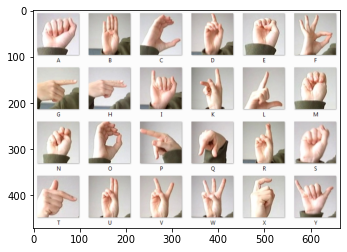

In [6]:
image = load_img("./lab6/amer_sign2.png")
plt.imshow(image)

In [7]:
labels = train['label'].values

In [8]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

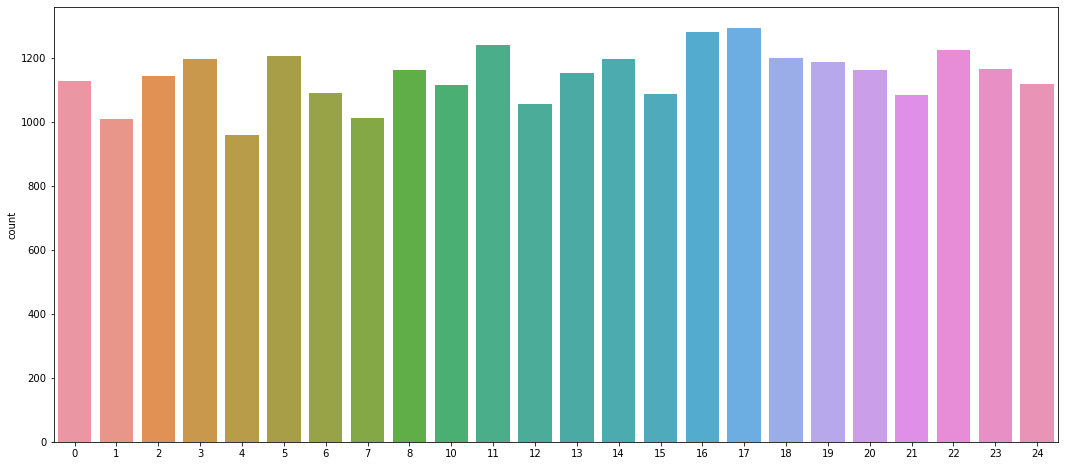

In [9]:
plt.figure(figsize = (18,8))
sns.countplot(x = labels)


In [10]:
train.drop('label', axis = 1, inplace = True)

In [11]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [12]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [13]:
images = train.values
print(images.dtype, np.round(images.min(), 4), np.round(images.max(), 4), images.shape)

int64 0 255 (27455, 784)


Text(0.5, 0.98, 'Grayscale images from Train dataset')

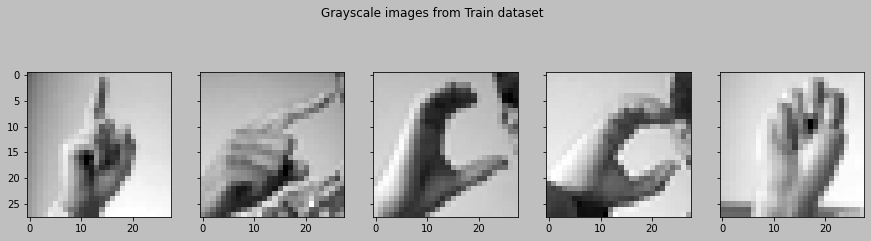

In [14]:
plt.style.use('grayscale')
fig, axs = plt.subplots(1, 5, figsize=(15, 4), sharey=True)
for i in range(5): 
        axs[i].imshow(images[i].reshape(28,28))
fig.suptitle('Grayscale images from Train dataset')

In [15]:
# images =  images/255

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, stratify = labels, random_state = 7)

In [17]:
x_train_t = np.stack([x_train.reshape(x_train.shape[0],28,28)]*3, axis=3).reshape(x_train.shape[0],28,28,3)
x_test_t = np.stack([x_test.reshape(x_test.shape[0],28,28)]*3, axis=3).reshape(x_test.shape[0],28,28,3)
x_train_t.shape, x_test_t.shape

((19218, 28, 28, 3), (8237, 28, 28, 3))

In [18]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

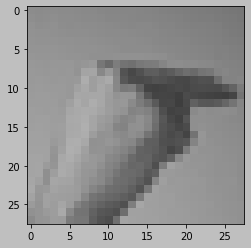

In [19]:
plt.imshow(x_train_t[0].reshape(28,28,3))

In [20]:
import tensorflow as tf
from tensorflow import keras

In [21]:
#Perform Data normalization
x_train = x_train / 255
x_test = x_test / 255

In [22]:
#Resize the images 48*48 as required by VGG16 
from keras.preprocessing.image import img_to_array, array_to_img
x_train_tt = np.asarray([img_to_array(array_to_img(im, scale=True).resize((48,48))) for im in x_train_t])/225
x_test_tt = np.asarray([img_to_array(array_to_img(im, scale=True).resize((48,48))) for im in x_test_t])/225
x_train_tt.shape, x_test_tt.shape

Using TensorFlow backend.


((19218, 48, 48, 3), (8237, 48, 48, 3))

W0419 20:17:53.577745  1240 image.py:709] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


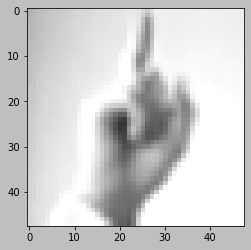

In [23]:
plt.imshow(x_test_tt[0].reshape(48,48,3))

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

num_classes = 24
batch_size = 128
epochs = 50

model = Sequential()

model.add(VGG16(weights='./lab6/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
                  include_top=False, pooling = 'avg',  
                  input_shape=(48, 48, 3)
                 ))

model.add(Dense(num_classes, activation = 'softmax'))

# Don't train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 24)                12312     
Total params: 14,727,000
Trainable params: 12,312
Non-trainable params: 14,714,688
_________________________________________________________________


In [25]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [26]:
from tensorflow.keras import models

history = model.fit(x_train_tt, y_train, validation_data = (x_test_tt, y_test), epochs=epochs, batch_size=batch_size)

Train on 19218 samples, validate on 8237 samples
Epoch 1/50
19218/19218 [==============================] - 96s 5ms/sample - loss: 2.2748 - accuracy: 0.4767 - val_loss: 1.6097 - val_accuracy: 0.7060
Epoch 2/50
19218/19218 [==============================] - 100s 5ms/sample - loss: 1.3070 - accuracy: 0.7684 - val_loss: 1.0877 - val_accuracy: 0.8113
Epoch 3/50
19218/19218 [==============================] - 100s 5ms/sample - loss: 0.9408 - accuracy: 0.8368 - val_loss: 0.8349 - val_accuracy: 0.8566
Epoch 4/50
19218/19218 [==============================] - 100s 5ms/sample - loss: 0.7408 - accuracy: 0.8788 - val_loss: 0.6792 - val_accuracy: 0.8921
Epoch 5/50
19218/19218 [==============================] - 100s 5ms/sample - loss: 0.6114 - accuracy: 0.9053 - val_loss: 0.5728 - val_accuracy: 0.9082
Epoch 6/50
19218/19218 [==============================] - 100s 5ms/sample - loss: 0.5183 - accuracy: 0.9240 - val_loss: 0.4943 - val_accuracy: 0.9222
Epoch 7/50
19218/19218 [============================

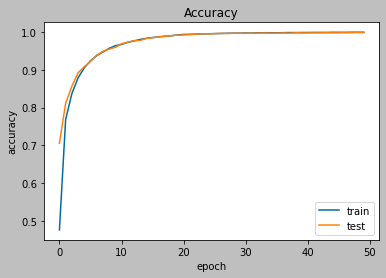

In [27]:
plt.style.use('tableau-colorblind10')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [28]:
test = pd.read_csv('./lab6/sign_mnist_test/sign_mnist_test.csv')

test_labels = test['label']

test.drop('label', axis = 1, inplace = True)

test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images_t = np.stack([test_images.reshape(test_images.shape[0],28,28)]*3, axis=3).reshape(test_images.shape[0],28,28,3)

# Resize the images 48*48 as required by VGG16
from keras.preprocessing.image import img_to_array, array_to_img
test_images_tt = np.asarray([img_to_array(array_to_img(im, scale=True).resize((48,48))) for im in test_images_t])/225
test_images_tt.shape

test_images_tt.shape

(7172, 48, 48, 3)

W0419 21:41:37.264333  1240 image.py:709] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


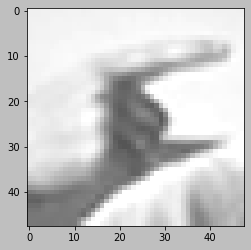

In [29]:
plt.imshow(test_images_tt[0].reshape(48,48,3))

In [30]:
test_labels = label_binrizer.fit_transform(test_labels)

In [31]:
test_images = test_images_tt.reshape(test_images.shape[0], 48, 48, 3)

In [32]:
test_images.shape

(7172, 48, 48, 3)

In [33]:
y_pred = model.predict(test_images)
from sklearn.metrics import accuracy_score
y_pred = y_pred.round()
accuracy_score(test_labels, y_pred)

0.9380925822643614